# Predicting House Prices

---
embed-resources: true
---

## Introduction

Today, I will make a model that will predict the price of a house based on its features such as number of bathrooms,rooms, baths, etc. This model only works for this dataset.

## Methods

In [1]:
# imports
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

### Data

In [2]:
# load data
housing_train = pd.read_parquet(
    "https://cs307.org/lab/data/housing-train.parquet",
)
housing_test = pd.read_parquet(
    "https://cs307.org/lab/data/housing-test.parquet",
)

housing_train

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2831,2832,908188140,160,RM,24.0,2522,Pave,None,Reg,Lvl,...,0,None,None,None,0,4,2006,WD,Normal,137500
2735,2736,905426150,80,RL,NaN,19690,Pave,None,IR1,Lvl,...,738,Gd,GdPrv,None,0,8,2006,WD,Alloca,274970
2134,2135,907200130,20,RL,97.0,11800,Pave,None,IR1,Bnk,...,0,None,None,None,0,8,2007,WD,Family,131000
2423,2424,528228415,120,RM,NaN,3072,Pave,None,Reg,Lvl,...,0,None,None,None,0,5,2006,WD,Normal,178740
1966,1967,535457020,20,RL,80.0,8000,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,11,2007,WD,Normal,156500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1020,527302070,20,RL,NaN,10825,Pave,None,IR1,Lvl,...,0,None,None,None,0,7,2008,WD,Normal,181900
236,237,905426200,20,RL,65.0,11479,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,6,2010,WD,Normal,144500
1546,1547,910202050,30,RM,40.0,3636,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,1,2008,WD,Normal,55000
1854,1855,533251110,20,RL,80.0,12000,Pave,None,Reg,Lvl,...,0,None,None,None,0,3,2007,WD,Normal,255000


From the train data above, each row shows a house and it's characteristics such as price, size, and number of bathrooms. The variables in the data set are:

### Response 

**`SalePrice`**

- [int64] Sale price


### Features

**`order`**

- [int64] Observation number

**`PID`**

- [int64] Parcel identification number - can be used with city web site for parcel review

**`MS SubClass`**

- [int64] Identifies the type of dwelling involved in the sale

**`MS Zoning`**

- [object] Identifies the general zoning classification of the sale.

**`Lot Frontage`**

- [float64] Linear feet of street connected to property

**`Lot Area`**

- [int64] Lot size in square feet

**`Street`**

- [object] Type of road access to property

**`Alley`**

- [object] Type of alley access to property

**`Lot Shape`**

- [object] General shape of property

**`Land Contour`**

- [object] Flatness of the property

**`Utilities`**

- [object] Type of utilities available

**`Lot Config`**

- [object] Lot configuration

**`Slope`**

- [object] Slope of property

**`Neighborhood`**

- [object] Physical locations within Ames city limits (map available)

**`Condition 1`**

- [object] Proximity to various conditions


**`Condition 2`**

- [object] Proximity to various conditions (if more than one is present)


**`Bldg Type`**

- [object] Type of dwelling


**`House Style`**

- [object] Style of dwelling

**`Overall Qual`**

- [int64] Rates the overall material and finish of the house

**`Overall Cond`**

- [int64] Rates the overall condition of the house

**`Year Built`**

- [int64] Original construction date


**`Year Remod/Add`**

- [int64] Remodel date (same as construction date if no remodeling or additions)


**`Roof Style`**

- [object] Type of roof

**`Roof Matl`**

- [object] Roof material

**`Exterior 1st`**

- [object] Exterior covering on house

**`Exterior 2nd`**

- [object] Exterior covering on house (if more than one material)

**`Mas Vnr Type`**

- [object] Masonry veneer type

**`Mas Vnr Area`**

- [float64] Masonry veneer area in square feet

**`Exter Qual`**

- [object] Evaluates the quality of the material on the exterior

**`Exter Cond`**

- [object] Evaluates the present condition of the material on the exteriort

**`Foundation`**

- [object] Type of foundation

**`Bsmt Qual`**

- [object] Evaluates the height of the basement

**`Bsmt Cond`**

- [object] Evaluates the general condition of the basement

**`Bsmt Exposure`**

- [object] Refers to walkout or garden level walls

**`BsmtFin Type 1`**

- [object] Rating of basement finished area

**`BsmtFin SF 1`**

- [float64] Type 1 finished square feet

**`BsmtFin Type 2`**

- [object] Rating of basement finished area (if multiple types)

**`BsmtFin SF 2`**

- [float64] Type 2 finished square feet

**`Bsmt Unf SF`**

- [float64] Unfinished square feet of basement area

**`Total Bsmt SF`**

- [float64] Total square feet of basement area

**`Heating`**

- [object] Type of heating

**`Heating QC`**

- [object] Heating quality and condition

**`Central Air`**

- [object] Central air conditioning

**`Electrical`**

- [object] Electrical system

**`1st Flr SF`**

- [int64] First Floor square feet

**`2nd Flr SF`**

- [int64] Second floor square feet

**`Low Qual Fin SF`**

- [int64] Low quality finished square feet (all floors)

**`Gr Liv Area`**

- [int64] Above grade (ground) living area square feet

**`Bsmt Full Bath`**

- [float64] Basement full bathrooms

**`Bsmt Half Bath`**

- [float64] Basement half bathrooms

**`Full Bath`**

- [int64] Full bathrooms above grade

**`Half Bath`**

- [int64] Half baths above grade

**`Bedroom AbvGr`**

- [int64] Bedrooms above grade (does not include basement bedrooms)

**`Kitchen AbvGr`**

- [int64] Kitchens above grade

**`Kitchen Qual`**

- [object] Kitchen quality

**`TotRms AbvGrd`**

- [int64] Total rooms above grade (does not include bathrooms)

**`Functional`**

- [object] Home functionality (Assume typical unless deductions are warranted)

**`Fireplaces`**

- [int64] Number of fireplaces

**`Fireplace Qu`**

- [object] Fireplace quality

**`Garage Type`**

- [object] Garage location

**`Garage Yr Blt`**

- [float64] Year garage was built

**`Garage Finish`**

- [object] Interior finish of the garage

**`Garage Cars`**

- [float64] Size of garage in car capacity

**`Garage Area`**

- [float64] Size of garage in square feet

**`Garage Qual`**

- [object] Garage quality

**`Garage Cond`**

- [object] Garage condition

**`Paved Drive`**

- [object] Paved driveway

**`Wood Deck SF`**

- [int64] Wood deck area in square feet

**`Open Porch SF`**

- [int64] Open porch area in square feet

**`Enclosed Porch`**

- [int64] Enclosed porch area in square feet

**`3Ssn Porch`**

- [int64] Three season porch area in square feet

**`Screen Porch`**

- [int64] Screen porch area in square feet

**`Pool Area`**

- [int64] Pool area in square feet

**`Pool QC`**

- [object] Pool quality

**`Fence`**

- [object] Fence quality

**`Fence`**

- [object] Fence quality

**`Fence`**

- [object] Fence quality

**`Fence`**

- [object] Fence quality

**`Fence`**

- [object] Fence quality

**`Fence`**

- [object] Fence quality

**`Fence`**

- [object] Fence quality

**`Misc Feature`**

- [object] Miscellaneous feature not covered in other categories

**`Misc Val`**

- [int64] Value of miscellaneous feature

**`Mo Sold`**

- [int64] Month Sold

**`Yr Sold`**

- [int64] Year Sold

**`Sale Type`**

- [object] Type of sale

**`Sale Condition`**

- [object] Condition of sale




For our summary statistics, we have 1875 rows which each row is a house and its 82 columns of information related to that house.

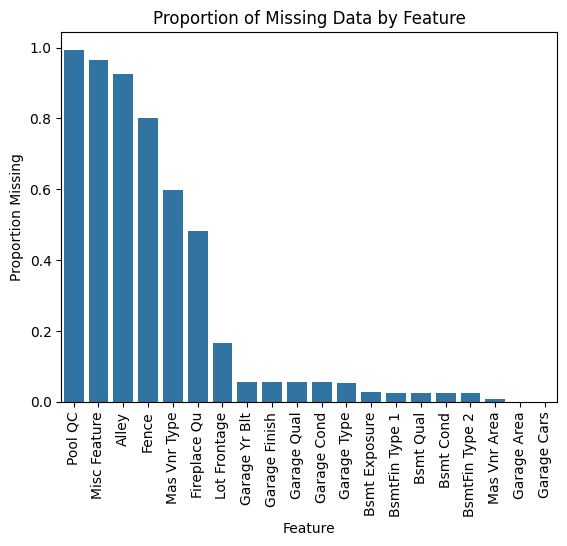

In [3]:
# exploratory visualization
missing_data = housing_train.isnull().mean().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.title('Proportion of Missing Data by Feature')
plt.ylabel('Proportion Missing')
plt.xlabel('Feature')
plt.show()

The graph above shows the columns or features of houses that have a lot of missing data. With this, we can know which columns to not include into our model to get the most accurate results. 

### Models

In [4]:
# process data for ML

X_train = housing_train.drop("SalePrice", axis=1)
y_train = housing_train["SalePrice"]

# create X and y for test dataset
X_test = housing_test.drop("SalePrice", axis=1)
y_test = housing_test["SalePrice"]

numeric = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical = X_train.select_dtypes(include=['object']).columns
exclude_columns = ['Order', 'PID', 'Misc Feature']
categorical_informative_missing = ['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence']
new_numeric = [col for col in numeric if col not in exclude_columns]
categorical = [col for col in categorical if col not in exclude_columns]
new_categorical = [col for col in categorical if col not in categorical_informative_missing]

In [5]:
def get_columns_many_missing(df, porp):
    columns = []
    for col in df.columns:
        if df[col].isnull().mean() > porp:
            columns.append(col)
    return columns
get_columns_many_missing(X_train, 0.50)

['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']

After figuring out which columns have more than 50% of their data missing, I have excluded those columns to be used for our model

In [6]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='infrequent_if_exist')
)
preprocessor = make_column_transformer(
    (numeric_transformer, new_numeric),
    (categorical_transformer, new_categorical),
    remainder='drop'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(random_state=100))
])

In [7]:
# train models
param_grid = {
    'classifier__n_estimators': [300],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [15]
}
model = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv = 3,
    scoring = 'neg_mean_absolute_percentage_error',
    n_jobs = 1
)
_ = model.fit(X_train, y_train)

After making our pipelines, we make our model and fit it to our training data.

## Results

In [8]:
# report model metrics
pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, pred)
print(f"Test MAPE: {mape}")

Test MAPE: 0.09399309492216686


When using our model on the test set, we achieve a mean absolute percentage score (MAPE) of 0.09399.

In [11]:
# serialize model
dump(model, 'housing.joblib')

['housing.joblib']

## Discussion

Our final model achieves a MAPE score of 0.09399 which means that the predicted value of a house is on average 9.4% away from the actual value of the house.

Since our model is predicting the price of a house, it is okay to have a little bit of error. Usually anything under 10% is a good sign for predicting house prices. This can help the buyers see the ranges of some houses and it can help them to see if a listing to a house is overpriced. For example, if a home is worth $300,000, our model could predict the value to be between $272,000 and $327,900 which is pretty close to the real value. This can help both buyers and sellers of houses because buyers can see if a house is fairly priced or not and sellers cn use it to help set up pricing for houses.

Even though the goal was to make the MAPE score as low as possible, this is the best score we are able achieve without having a file size extremely big. 

From the scatter plot shown below we can see how well our model has preformed. The red line represents that actual price of a house while the blue dots represent the predicted price of a house from the model. We can see that our model preformed well with an actual sale price about less than $250,000 since the blue dots are very close to the red line but as the price increases, we also notice that some prices are further from the actual value. This could be a due to a lack of houses with an actual price over $300,000. If we had more houses priced over $300,000, the model could better make predictions in the upper ranges of price.

Overall, we should use this model because the MAPE score is low and the cost of error is low. Even if the model can be wrong, its predictions are still close to the actual value.

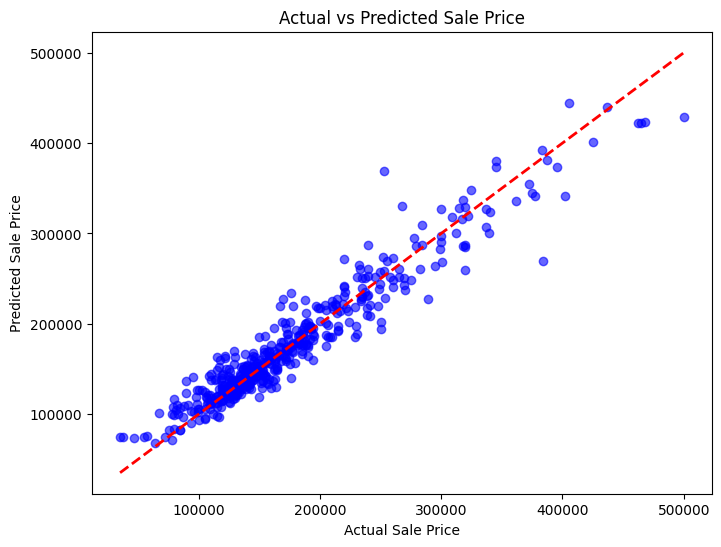

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()